In [26]:
from fonctions.gestion_bdd import lire_bdd_perso, sauvegarde_bdd
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [27]:
df = lire_bdd_perso('''select suivi_rank.*, tracker.riot_id, tracker.riot_tagline from suivi_rank
                       inner join tracker on suivi_rank.index = tracker.id_compte
                       where saison = 14 ''', index_col=None).T

In [33]:
df[['index', 'wins', 'losses', 'LP', 'saison']] = df[['index', 'wins', 'losses', 'LP', 'saison']].astype(int)
df['datetime'] = pd.to_datetime(df['datetime'])

In [34]:
dict_points = {'F': 0,
                                        'B': 400,
                                        'S': 800,
                                        'G': 1200,
                                        'P': 1600,
                                        'E' : 2000,
                                        'D': 2400,
                                        'M': 2800,
                                        'GM': 3200,
                                        'C': 5000,
                                        'I': 300,
                                        'II': 200,
                                        'III': 100,
                                        'IV': 0,
                                        ' ': 0,
                                        '': 0}
        
dict_color = {'fer' : {'background' : '#252430', 'courbe' : '#7c6f71'},
                        'bronze' : {'background' : '#332a31', 'courbe' : '#785d4f'},
                        'silver' : {'background' : '#323440', 'courbe' : '#727879'},
                        'gold' : {'background' : '#352e31', 'courbe' : '#c88c3d'},
                        'platine' : {'background' : '#213041', 'courbe' : '#43a9d4'},
                        'emeraude' : {'background' : '#1d292b', 'courbe' : '#399a3f'},
                        'diamant' : {'background' : '#332a52', 'courbe' : '#7b3fe8'},
                        'master' : {'background' : '#58363c', 'courbe' : '#9f5c4f'},
                        'gm' : {'background' : '#342631', 'courbe' : '#bb4e45'},
                        'challenger' : {'background' : '#38353a', 'courbe' : '#f0cb78'}}

In [35]:
def transfo_points(x):

    value = x['ladder'].split(' ')[1]
    if x['LP'] > 101 and x['ladder'][0] == 'G':
        value = 'GM'
    points = dict_points[x['ladder'][0]] + dict_points[value] + x['LP']
    return points


df['ladder'] = df['tier'].str[0] + ' ' + \
                                    df['rank'] + ' / ' + df['LP'].astype('str') + ' LP'


df['points'] = df.apply(transfo_points, axis=1)
                


df = df[df['points'] > 50]

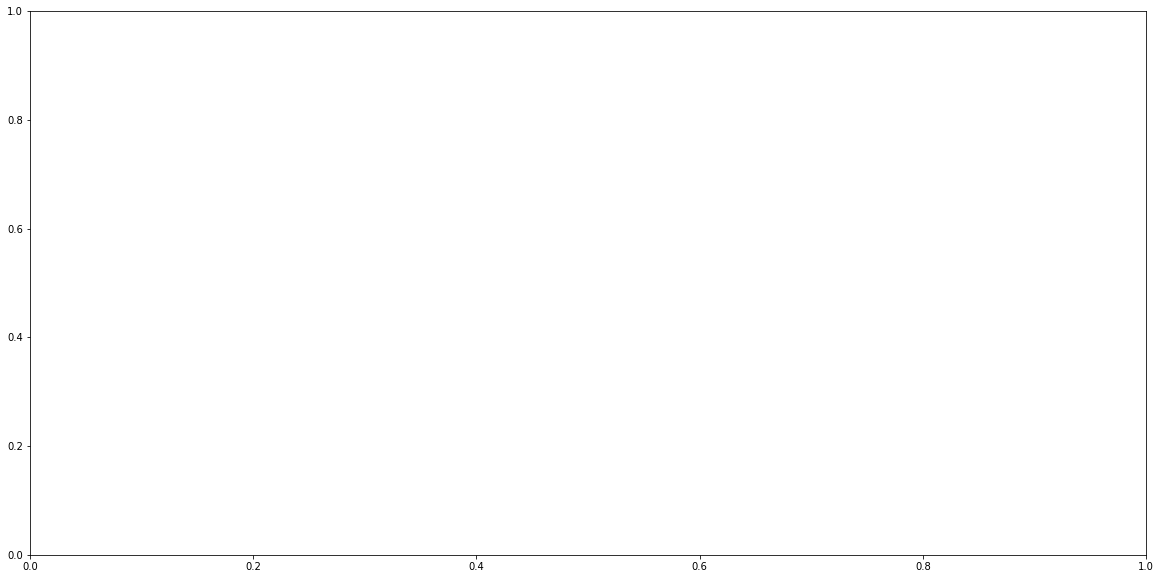

In [36]:
def creation_rank(value):
            return [value + 0, value + 100, value + 200, value + 300]
        
fig, ax = plt.subplots(figsize=(20, 10))

gap = 30

In [37]:
def creation_ligne(df, nb_games, gap, ax):


            # dates =np.linspace(0, 10000, 500)  pd.date_range(start="2023-01-01", end="2023-12-31", periods=500)  # Axe X : de janvier à décembre
            x =  np.arange(gap, nb_games + gap, 1)
            y = np.array(df['points'].tolist())               # Exemple de courbe : y = log(x + 1)



            points = np.array([x, y]).T.reshape(-1, 1, 2)

            segments = np.concatenate([points[:-1], points[1:]], axis=1)

            cmap = ListedColormap([dict_color['fer']['courbe'],
                                    dict_color['bronze']['courbe'],
                                    dict_color['silver']['courbe'],
                                    dict_color['gold']['courbe'],
                                    dict_color['platine']['courbe'],
                                    dict_color['emeraude']['courbe'],
                                    dict_color['diamant']['courbe'],
                                    dict_color['master']['courbe'],
                                    dict_color['gm']['courbe'],
                                    dict_color['challenger']['courbe']])
            
            norm = BoundaryNorm([50, dict_points['B'], dict_points['S'], dict_points['G'], dict_points['P'], dict_points['E'], dict_points['D'], dict_points['M'], dict_points['GM'], dict_points['C'], 12000], cmap.N)
            lc = LineCollection(segments, cmap=cmap, norm=norm)
            lc.set_array(y)
            lc.set_linewidth(2)

            return x, ax, lc

x = 0       
for joueur in df['riot_id'].unique():
    df_filter = df[df['riot_id'] == joueur]
    x1, ax, lc = creation_ligne(df, df_filter.shape[0], 50, ax)
    line = ax.add_collection(lc)
    x = max(x, x1)

# Personnalisation du graphique
ax.set_facecolor('#1e1e2f')  # Fond sombre
ax.spines['bottom'].set_color('#ffffff')
ax.spines['left'].set_color('#ffffff')
ax.tick_params(colors='black')

# Ajouter des lignes horizontales
y_levels_fer = creation_rank(dict_points['F'])  
y_levels_bronze = creation_rank(dict_points['B']) 
y_levels_silver = creation_rank(dict_points['S'])
y_levels_gold = creation_rank(dict_points['G'])
y_levels_plat = creation_rank(dict_points['P'])
y_levels_emeraude = creation_rank(dict_points['E'])
y_levels_diamant = creation_rank(dict_points['D'])
y_levels_master = creation_rank(dict_points['M'])
y_levels_gm = creation_rank(dict_points['GM'])
y_levels_chal = creation_rank(dict_points['C'])

liste_order = [4,3,2,1]

C:\Users\kevin\AppData\Local\Temp\ipykernel_528\3395121013.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  points = np.array([x, y]).T.reshape(-1, 1, 2)


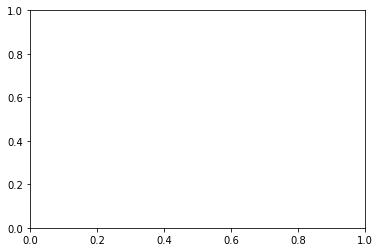

In [39]:
if not df[df['points'].between(50, dict_points['B'])].empty:
            # # Ajout des étiquettes
                for i, level in enumerate(y_levels_fer):
                    ax.axhline(y=level, color=dict_color['fer']['courbe'], linestyle='--', linewidth=0.8)  # Ligne pointillée
                    ax.text(gap, level, f'F{liste_order[i]}', color=dict_color['fer']['courbe'], fontsize=20, va='bottom')

                ax.axhspan(50, dict_points['B'], facecolor=dict_color['fer']['background'], alpha=0.3)

if not df[df['points'].between(dict_points['B'], dict_points['S'])].empty:
        for i, level in enumerate(y_levels_bronze):
            ax.axhline(y=level, color=dict_color['bronze']['courbe'], linestyle='--', linewidth=0.8)  # Ligne pointillée
            ax.text(gap, level, f'B{liste_order[i]}', color=dict_color['bronze']['courbe'], fontsize=20, va='bottom')

        ax.axhspan(dict_points['B'], dict_points['S'], facecolor=dict_color['bronze']['background'], alpha=0.3)

if not df[df['points'].between(dict_points['S'], dict_points['G'])].empty:
        for i, level in enumerate(y_levels_silver):
            ax.axhline(y=level, color=dict_color['silver']['courbe'], linestyle='--', linewidth=0.8)  # Ligne pointillée
            ax.text(gap, level, f'S{liste_order[i]}', color=dict_color['silver']['courbe'], fontsize=20, va='bottom')

        ax.axhspan(dict_points['S'], dict_points['G'], facecolor=dict_color['silver']['background'], alpha=0.3)

if not df[df['points'].between(dict_points['G'], dict_points['P'])].empty:
        for i, level in enumerate(y_levels_gold):
            ax.axhline(y=level, color=dict_color['gold']['courbe'], linestyle='--', linewidth=0.8)  # Ligne pointillée
            ax.text(gap, level, f'G{liste_order[i]}', color=dict_color['gold']['courbe'], fontsize=20, va='bottom')

        ax.axhspan(dict_points['G'], dict_points['P'], facecolor=dict_color['gold']['background'], alpha=0.3)

if not df[df['points'].between(dict_points['P'], dict_points['E'])].empty:
        for i, level in enumerate(y_levels_plat):
            ax.axhline(y=level, color=dict_color['platine']['courbe'], linestyle='--', linewidth=0.8)  # Ligne pointillée
            ax.text(gap, level, f'P{liste_order[i]}', color=dict_color['platine']['courbe'], fontsize=20, va='bottom')

        ax.axhspan(dict_points['P'], dict_points['E'], facecolor=dict_color['platine']['background'], alpha=0.3)

if not df[df['points'].between(dict_points['E'], dict_points['D'])].empty:
        for i, level in enumerate(y_levels_emeraude):
            ax.axhline(y=level, color=dict_color['emeraude']['courbe'], linestyle='--', linewidth=0.8)  # Ligne pointillée
            ax.text(gap, level, f'E{liste_order[i]}', color=dict_color['emeraude']['courbe'], fontsize=20, va='bottom')

        ax.axhspan(dict_points['E'], dict_points['D'], facecolor=dict_color['emeraude']['background'], alpha=0.3)

if not df[df['points'].between(dict_points['D'], dict_points['M'])].empty:
        for i, level in enumerate(y_levels_diamant):
            ax.axhline(y=level, color=dict_color['diamant']['courbe'], linestyle='--', linewidth=0.8)  # Ligne pointillée
            ax.text(gap, level, f'D{liste_order[i]}', color=dict_color['diamant']['courbe'], fontsize=20, va='bottom')

        ax.axhspan(dict_points['D'], dict_points['M'], facecolor=dict_color['diamant']['background'], alpha=0.3)

if not df[df['points'].between(dict_points['M'], dict_points['GM'])].empty:
        for i, level in enumerate(y_levels_master):
            ax.axhline(y=level, color=dict_color['master']['courbe'], linestyle='--', linewidth=0.8)  # Ligne pointillée
            ax.text(gap, level, f'M', color=dict_color['master']['courbe'], fontsize=20, va='bottom')

        ax.axhspan(dict_points['M'], dict_points['GM'], facecolor=dict_color['master']['background'], alpha=0.3)


if not df[df['points'].between(dict_points['GM'], dict_points['C'])].empty:
                # for i, level in enumerate(y_levels_gm):
        ax.axhline(y=dict_points['GM'], color=dict_color['gm']['courbe'], linestyle='--', linewidth=0.8)  # Ligne pointillée
        ax.text(gap, dict_points['GM'], f'GM', color=dict_color['gm']['courbe'], fontsize=20, va='bottom')

        ax.axhspan(dict_points['GM'], dict_points['C'], facecolor=dict_color['gm']['background'], alpha=0.3)

if not df[df['points'].between(dict_points['C'], 11000)].empty:
                # for i, level in enumerate(y_levels_chal):
        ax.axhline(y=dict_points['C'], color=dict_color['challenger']['courbe'], linestyle='--', linewidth=0.8)  # Ligne pointillée
        ax.text(gap, dict_points['C'], f'C', color=dict_color['challenger']['courbe'], fontsize=20, va='bottom')

        ax.axhspan(dict_points['C'], 11000, facecolor=dict_color['challenger']['background'], alpha=0.3)

        for index, data in df[df['points'] > dict_points['M']].iloc[::10].iterrows():

            plt.annotate(f'{data["LP"]:.0f}', 
                                (index+gap, data['points']), 
                                ha='center', 
                                fontsize=15,
                                color='white')
    

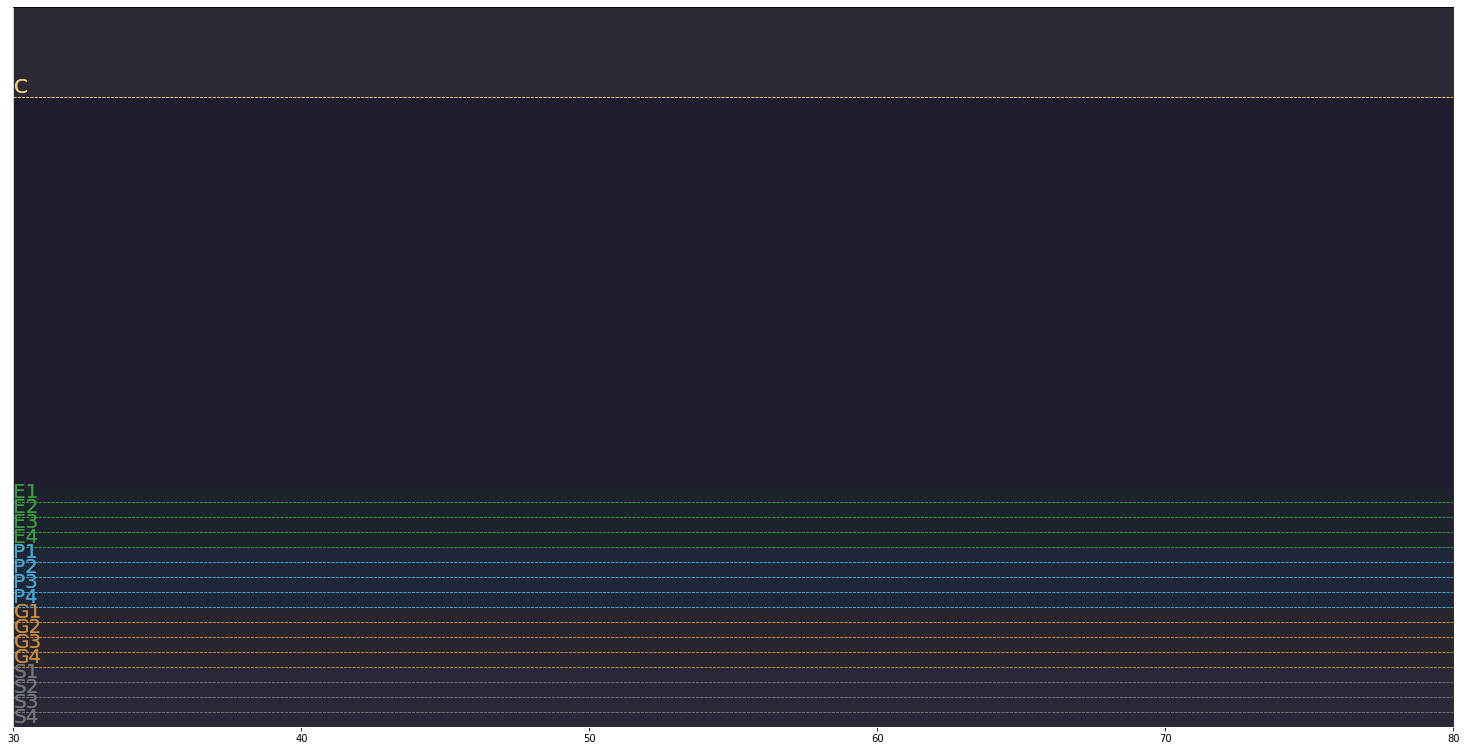

In [43]:
ax.set_xlim([gap, 50 + gap])

        # Trouver le multiple de 400 le plus proche pour le minimum (vers 0)


min_multiple_400 = np.floor(df[df['points'] > 50]['points'].min() / 400) * 400
        



max_multiple_400 = np.ceil(df['points'].max() / 400) * 400



ax.set_ylim([min_multiple_400, max_multiple_400])

        # Désactiver les valeurs de l'axe Y
ax.yaxis.set_ticks([])


        # Ajouter des annotations toutes les 50 valeurs de x
for i in range(gap, len(x), gap):  # On prend tous les 50 indices
    plt.annotate(f'{x[i]-gap:.0f}', 
        (x[i], min_multiple_400+10), 
                        ha='center', 
                        fontsize=15,
                        color='white')

fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)



fig
